In [47]:
from tensorflow.keras.models import load_model
from tensorflow.keras.optimizers import Adam
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau
from modules.training_and_fine_tuning.training.train_cnn_model_using_feature_statistics import CnnModelUsingFeatureStatistics
from modules.training_and_fine_tuning.utils.feature_statistics_data_utils import DataUtils
from config.vi_config import VietnameseDatasetConfig
from modules.training_and_fine_tuning.utils.model_utils import ModelUtilities

In [48]:
def get_n_mfcc_paths(n_mfcc, Config):
    train_path = Config.n_mfcc_config[n_mfcc].train_path
    validation_path = Config.n_mfcc_config[n_mfcc].validation_path
    test_path = Config.n_mfcc_config[n_mfcc].test_path
    return train_path, validation_path, test_path

In [49]:
n_mfcc = 26
train_file_path, val_file_path, test_file_path = get_n_mfcc_paths(n_mfcc, VietnameseDatasetConfig)
print(train_file_path, test_file_path, val_file_path )
x_traincnn, y_train, x_valcnn, y_val, scaler = DataUtils.prepare_data_for_train_model(train_file_path, val_file_path)

D:/data_analysis/speech_emotion_recognition/data/VietnameseDataset/features/statistic_features/26/train.csv D:/data_analysis/speech_emotion_recognition/data/VietnameseDataset/features/statistic_features/26/test.csv D:/data_analysis/speech_emotion_recognition/data/VietnameseDataset/features/statistic_features/26/validation.csv


In [50]:
import joblib
def save_scaler(scaler):
    joblib.dump(scaler, 'models/best_fine_tuned_scaler.pkl')

save_scaler(scaler)

In [51]:
x_traincnn.shape

(1053, 307, 1)

In [52]:
y_train.shape

(1053, 7)

In [53]:
x_valcnn.shape

(177, 307, 1)

In [54]:
y_val.shape

(177, 7)

In [55]:
cnn_model_statistics = ModelUtilities.load_model(f'models/best_model_E5.3.keras')

In [56]:
num_layers_to_unfreeze = 2

for layer in cnn_model_statistics.layers:
    layer.trainable = False

for layer in cnn_model_statistics.layers[-num_layers_to_unfreeze:]:
    layer.trainable = True

for i, layer in enumerate(cnn_model_statistics.layers):
    print(f"Layer {i}: {layer.name}, Trainable: {layer.trainable}")


Layer 0: conv1d, Trainable: False
Layer 1: batch_normalization, Trainable: False
Layer 2: conv1d_1, Trainable: False
Layer 3: batch_normalization_1, Trainable: False
Layer 4: max_pooling1d, Trainable: False
Layer 5: dropout, Trainable: False
Layer 6: conv1d_2, Trainable: False
Layer 7: batch_normalization_2, Trainable: False
Layer 8: conv1d_3, Trainable: False
Layer 9: batch_normalization_3, Trainable: False
Layer 10: max_pooling1d_1, Trainable: False
Layer 11: dropout_1, Trainable: False
Layer 12: flatten, Trainable: False
Layer 13: dense, Trainable: False
Layer 14: batch_normalization_4, Trainable: False
Layer 15: dropout_2, Trainable: True
Layer 16: dense_1, Trainable: True


In [57]:
cnn_model_statistics.compile(optimizer=Adam(learning_rate=0.0001), loss='categorical_crossentropy', metrics=['accuracy'])

In [58]:
cnn_model_statistics.summary()

Model: "sequential"

┏━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━━━━━━━━━━┳━━━━━━━━━━━━━━━┓
┃ Layer (type)                    ┃ Output Shape           ┃       Param # ┃
┡━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━━━━━━━━━━╇━━━━━━━━━━━━━━━┩
│ conv1d (Conv1D)                 │ (None, 307, 128)       │           512 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization             │ (None, 307, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_1 (Conv1D)               │ (None, 307, 128)       │        49,280 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_1           │ (None, 307, 128)       │           512 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d (MaxPooling1D)    │ (None, 154, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout (Dropout)               │ (None, 154, 128)       │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_2 (Conv1D)               │ (None, 154, 64)        │        24,640 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_2           │ (None, 154, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ conv1d_3 (Conv1D)               │ (None, 154, 64)        │        12,352 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_3           │ (None, 154, 64)        │           256 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ max_pooling1d_1 (MaxPooling1D)  │ (None, 77, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_1 (Dropout)             │ (None, 77, 64)         │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ flatten (Flatten)               │ (None, 4928)           │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense (Dense)                   │ (None, 256)            │     1,261,824 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ batch_normalization_4           │ (None, 256)            │         1,024 │
│ (BatchNormalization)            │                        │               │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dropout_2 (Dropout)             │ (None, 256)            │             0 │
├─────────────────────────────────┼────────────────────────┼───────────────┤
│ dense_1 (Dense)                 │ (None, 7)              │         1,799 │
└─────────────────────────────────┴────────────────────────┴───────────────┘

 Total params: 1,352,967 (5.16 MB)

 Trainable params: 1,799 (7.03 KB)

 Non-trainable params: 1,351,168 (5.15 MB)

In [59]:
import numpy as np
from sklearn.utils import class_weight
from tensorflow.keras.callbacks import ModelCheckpoint, EarlyStopping, ReduceLROnPlateau

# Assuming y_train, y_val, x_traincnn, x_valcnn, and cnn_model_statistics are already defined

# Ensure y_train is a flat array
y_train_flat = np.array(y_train).flatten()

# Compute class weights to handle imbalanced classes
class_weights = class_weight.compute_class_weight(
    'balanced',
    classes=np.unique(y_train_flat),  # Ensure classes is a list of unique labels
    y=y_train_flat
)

# Convert the class weights to a dictionary format required by the fit method
class_weights_dict = {i: weight for i, weight in enumerate(class_weights)}

# Initialize callbacks
model_checkpoint = ModelCheckpoint(
    'models/best_fine_tuned_model.keras', 
    monitor='val_accuracy', 
    save_best_only=True
)
early_stop = EarlyStopping(
    monitor='val_accuracy',
    mode='max', 
    patience=30, 
    restore_best_weights=True
)
lr_reduction = ReduceLROnPlateau(
    monitor='val_accuracy', 
    patience=10, 
    verbose=1, 
    factor=0.7, 
    min_lr=1e-6
)

# Train the model with class weights and callbacks
history = cnn_model_statistics.fit(
    x_traincnn, 
    y_train, 
    epochs=200, 
    validation_data=(x_valcnn, y_val), 
    batch_size=16, 
    callbacks=[model_checkpoint, early_stop, lr_reduction]
)

Epoch 1/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 1s 8ms/step - accuracy: 0.3433 - loss: 2.4508 - val_accuracy: 0.3390 - val_loss: 2.1122 - learning_rate: 1.0000e-04
Epoch 2/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3410 - loss: 2.5133 - val_accuracy: 0.3503 - val_loss: 2.0245 - learning_rate: 1.0000e-04
Epoch 3/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3710 - loss: 2.1819 - val_accuracy: 0.3729 - val_loss: 1.9453 - learning_rate: 1.0000e-04
Epoch 4/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3634 - loss: 2.3607 - val_accuracy: 0.3955 - val_loss: 1.8711 - learning_rate: 1.0000e-04
Epoch 5/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3615 - loss: 2.0976 - val_accuracy: 0.4124 - val_loss: 1.8022 - learning_rate: 1.0000e-04
Epoch 6/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3359 - loss: 2.1757 - val_accuracy: 0.4350 - val_loss: 1.7385 - learning_rate: 1.0000e-04
Epoch 7/200
66/66 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step - accuracy: 0.3806 

In [60]:
history_dict = history.history
print(history_dict)

{'accuracy': [0.32478633522987366, 0.3333333432674408, 0.36277303099632263, 0.3751187026500702, 0.37037035822868347, 0.38746437430381775, 0.41120606660842896, 0.4036087393760681, 0.42830008268356323, 0.43589743971824646, 0.45773980021476746, 0.45489078760147095, 0.4729344844818115, 0.47863247990608215, 0.47863247990608215, 0.47673314809799194, 0.491927832365036, 0.5099714994430542, 0.5166192054748535, 0.5289648771286011, 0.539411187171936, 0.5441595315933228, 0.5603038668632507, 0.5754985809326172, 0.583095908164978, 0.5726495981216431, 0.5783475637435913, 0.5754985809326172, 0.5897436141967773, 0.6001899242401123, 0.6144349575042725, 0.6115859746932983, 0.6220322847366333, 0.6011396050453186, 0.6163342595100403, 0.62678062915802, 0.6362773180007935, 0.6315289735794067, 0.6467236280441284, 0.6476733088493347, 0.6410256624221802, 0.6353276371955872, 0.6419752836227417, 0.6780626773834229, 0.6581196784973145, 0.6514719724655151, 0.6657170057296753, 0.6685659885406494, 0.6524216532707214,

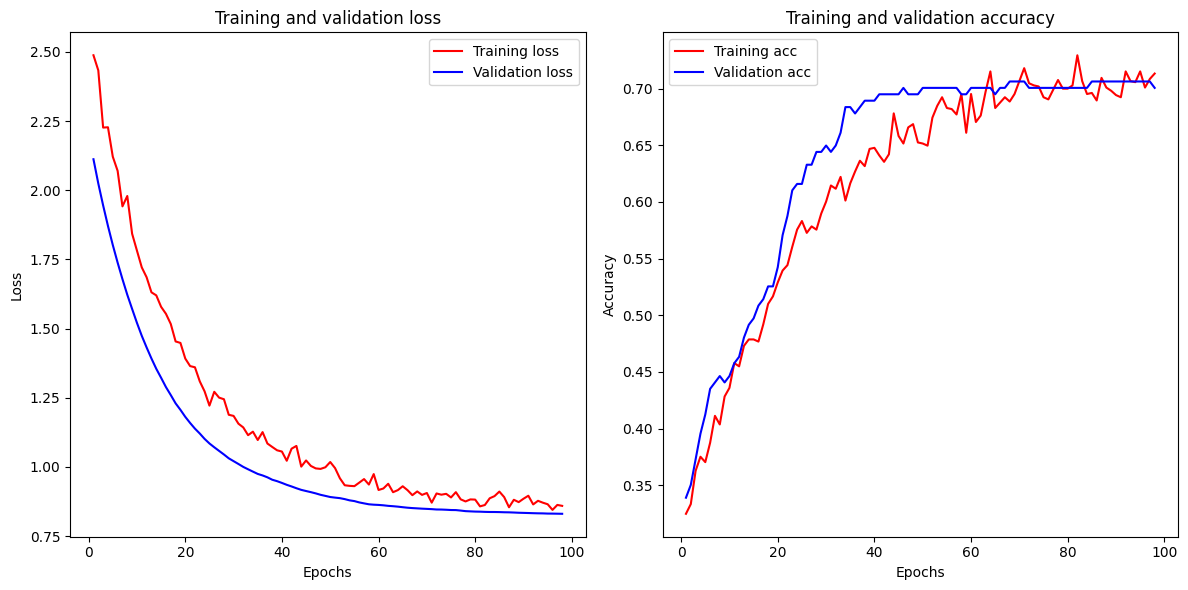

In [61]:
ModelUtilities.plot_training_history(history_dict)

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 24ms/step


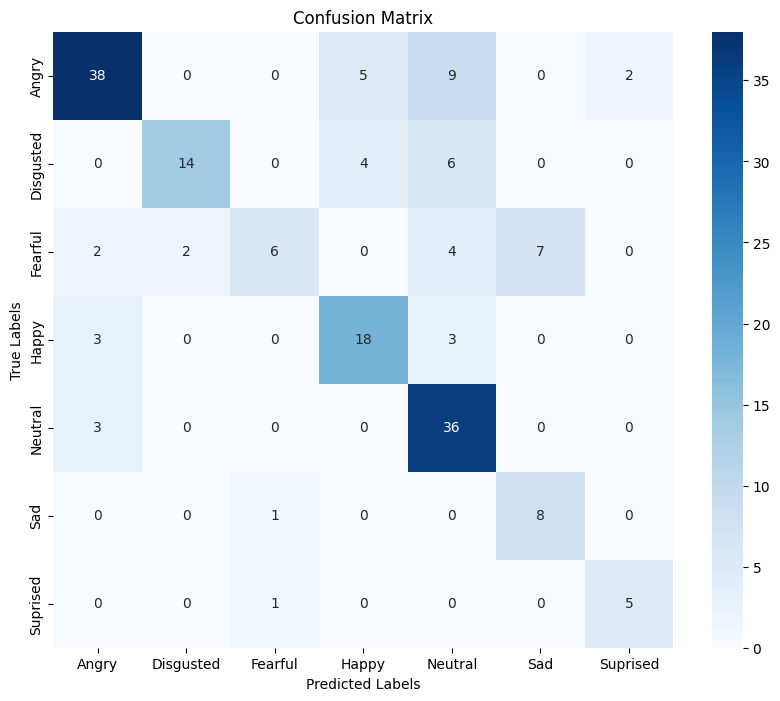

In [62]:
ModelUtilities.plot_confusion_matrix(cnn_model_statistics, x_valcnn, y_val, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])

6/6 ━━━━━━━━━━━━━━━━━━━━ 0s 5ms/step 


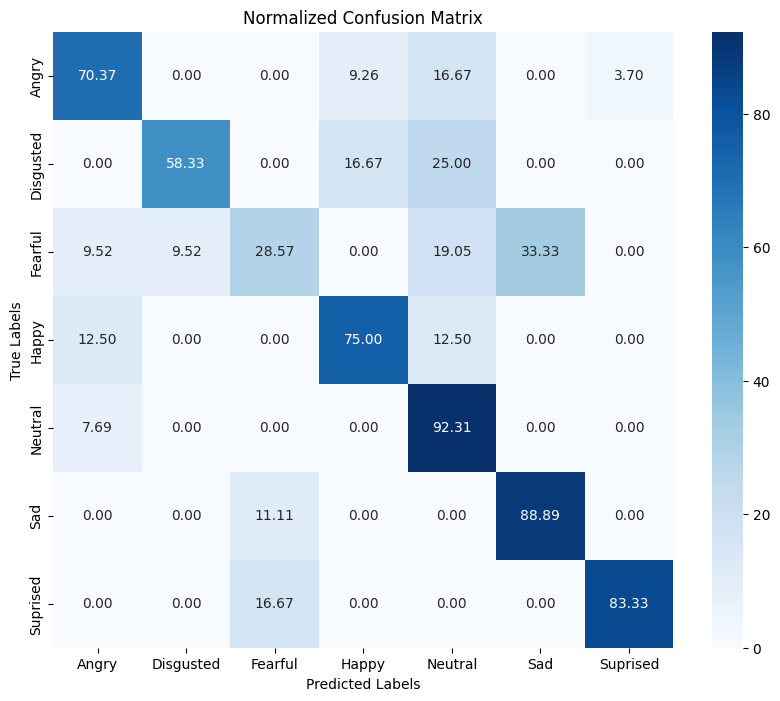

In [63]:
ModelUtilities.plot_confusion_matrix_normalized(cnn_model_statistics, x_valcnn, y_val, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])

In [64]:
x_testcnn, y_test = DataUtils.prepare_data_for_test_model(test_file_path, scaler)

In [65]:
x_testcnn.shape

(101, 307, 1)

In [66]:
y_test.shape

(101, 7)

In [67]:
loss, accuracy = cnn_model_statistics.evaluate(x_testcnn, y_test)
print(f'Test Loss: {loss}, Test Accuracy: {accuracy}')

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step - accuracy: 0.7179 - loss: 0.8061 
Test Loss: 0.8882445693016052, Test Accuracy: 0.6930692791938782


4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 2ms/step 


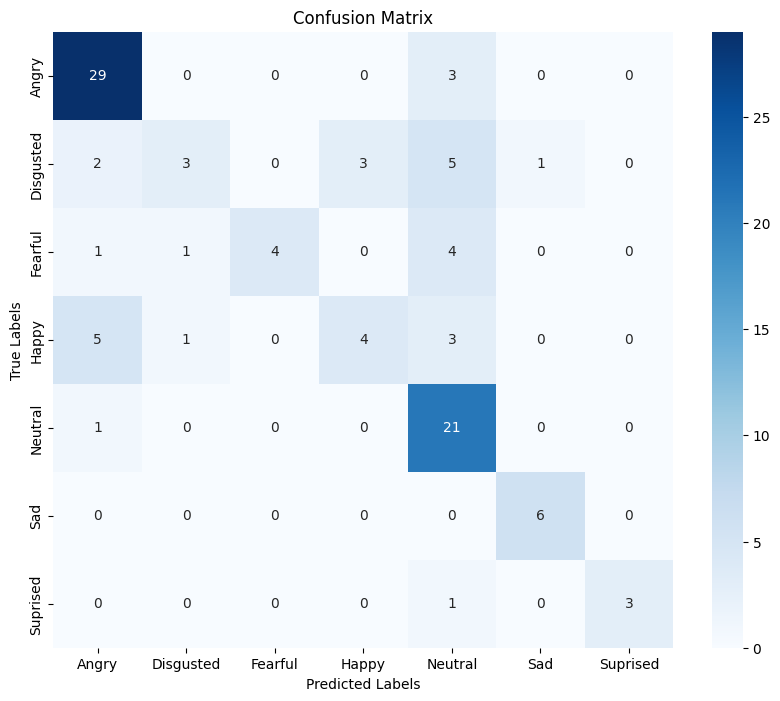

In [68]:
ModelUtilities.plot_confusion_matrix(cnn_model_statistics, x_testcnn, y_test, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])

4/4 ━━━━━━━━━━━━━━━━━━━━ 0s 4ms/step 


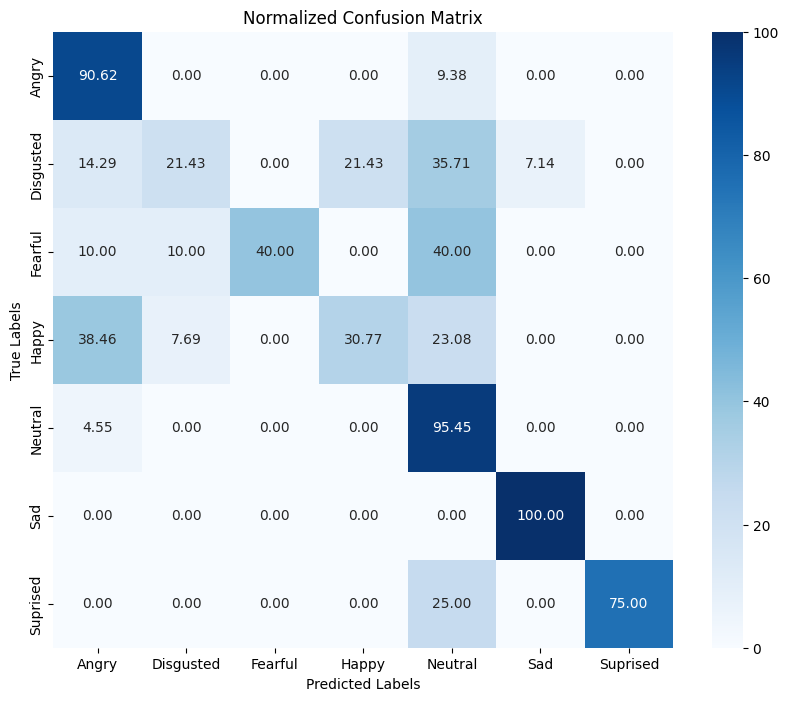

In [69]:
ModelUtilities.plot_confusion_matrix_normalized(cnn_model_statistics, x_testcnn, y_test, ['Angry', 'Disgusted', 'Fearful', 'Happy', 'Neutral', 'Sad', 'Suprised'])